In [1]:
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 3s 0us/step


In [2]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


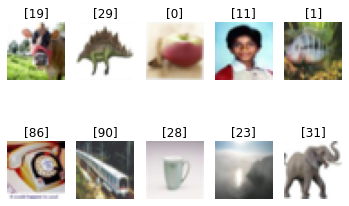

In [4]:
for i in range(10):
    plt.subplot(2,5, i + 1)
    plt.imshow(X_train[i]), plt.axis("off")
    plt.title(y_train[i])

In [5]:
X_train = X_train / 255.
X_test = X_test / 255.

In [6]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [8]:
model1 = Sequential([
        Conv2D(32,(3,3), input_shape = X_train.shape[1:], padding="same", activation = "relu"),
        Conv2D(32,(3,3), activation = "leaky_relu"),
        MaxPooling2D(),
        Dropout(0.3),
        Conv2D(64,(3,3), padding ="same", activation = "relu"),
        Conv2D(32,(3,3), activation = "leaky_relu"),
        MaxPooling2D(),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation = 'relu'),
        Dense(256, activation = "relu"),
        Dense(100, activation = "softmax")
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                        

In [9]:
model1.compile(optimizer = RMSprop(learning_rate=0.001, decay = 1e-6), loss= "categorical_crossentropy", metrics = ["accuracy"])
model_path = "best_cifar100_model_v1.h5"
mc = ModelCheckpoint(model_path, save_best_only=True)
es = EarlyStopping(patience = 20, verbose = 1)

In [10]:
hist = model1.fit(X_train, y_train,
           callbacks = [mc,es], epochs = 100,
           validation_split=0.2, batch_size = 32)

Epoch 1/100
1250/1250 [==============================] - 19s 6ms/step - loss: 3.7694 - accuracy: 0.1294 - val_loss: 3.3547 - val_accuracy: 0.1966
Epoch 2/100
1250/1250 [==============================] - 7s 6ms/step - loss: 3.0572 - accuracy: 0.2499 - val_loss: 2.8873 - val_accuracy: 0.2906
Epoch 3/100
1250/1250 [==============================] - 8s 6ms/step - loss: 2.7186 - accuracy: 0.3154 - val_loss: 2.8140 - val_accuracy: 0.3115
Epoch 4/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.4685 - accuracy: 0.3670 - val_loss: 2.5937 - val_accuracy: 0.3591
Epoch 5/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2787 - accuracy: 0.4073 - val_loss: 2.5248 - val_accuracy: 0.3680
Epoch 6/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1258 - accuracy: 0.4415 - val_loss: 2.5248 - val_accuracy: 0.3770
Epoch 7/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9839 - accuracy: 0.4682 - val_loss: 2.5078 - val_a

In [11]:
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.2699 - accuracy: 0.4019


[3.269869089126587, 0.4018999934196472]

In [12]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.4580 - accuracy: 0.4115


[2.457970142364502, 0.4115000069141388]

## 데이터 부풀려서 하기

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, stratify = y_train, test_size = 0.2, random_state = seed
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 17,
    width_shift_range = 0.2,
    shear_range = 0.5,
    height_shift_range = 0.2,
    zoom_range = [0.7, 1.6],
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = "nearest"
)

datagen.fit(X_train)

In [15]:
model2 = Sequential([
        Conv2D(32,(3,3), input_shape = X_train.shape[1:], padding="same", activation = "relu"),
        Conv2D(32,(3,3), activation = "leaky_relu"),
        MaxPooling2D(),
        Dropout(0.3),
        Conv2D(64,(3,3), padding ="same", activation = "relu"),
        Conv2D(32,(3,3), activation = "relu"),
        MaxPooling2D(),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation = 'relu'),
        Dense(256, activation = "relu"),
        Dense(100, activation = "softmax")
])
model2.summary()

model2.compile(optimizer = RMSprop(learning_rate=0.001, decay = 1e-6), loss= "categorical_crossentropy", metrics = ["accuracy"])
model_path = "best_cifar100_model_v2.h5"
mc = ModelCheckpoint(model_path, save_best_only=True)
es = EarlyStopping(patience = 20, verbose = 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        18464     
                                                      

In [16]:
hist2 = model2.fit(
    datagen.flow(X_train, y_train, batch_size = 32),
    validation_data = (X_valid, y_valid),
    epochs = 100, callbacks = [mc,es]
)

Epoch 1/100
1250/1250 [==============================] - 25s 19ms/step - loss: 4.1301 - accuracy: 0.0647 - val_loss: 3.6978 - val_accuracy: 0.1287
Epoch 2/100
1250/1250 [==============================] - 24s 19ms/step - loss: 3.7283 - accuracy: 0.1218 - val_loss: 3.4915 - val_accuracy: 0.1542
Epoch 3/100
1250/1250 [==============================] - 24s 19ms/step - loss: 3.5700 - accuracy: 0.1473 - val_loss: 3.2601 - val_accuracy: 0.2050
Epoch 4/100
1250/1250 [==============================] - 24s 19ms/step - loss: 3.4678 - accuracy: 0.1685 - val_loss: 3.2887 - val_accuracy: 0.2000
Epoch 5/100
1250/1250 [==============================] - 24s 20ms/step - loss: 3.3962 - accuracy: 0.1788 - val_loss: 3.3908 - val_accuracy: 0.1883
Epoch 6/100
1250/1250 [==============================] - 24s 19ms/step - loss: 3.3589 - accuracy: 0.1905 - val_loss: 3.2677 - val_accuracy: 0.2071
Epoch 7/100
1250/1250 [==============================] - 24s 20ms/step - loss: 3.3055 - accuracy: 0.1980 - val_loss: 3

In [22]:
best_model2 = load_model(model_path)
best_model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.7278 - accuracy: 0.3173


[2.7277770042419434, 0.3172999918460846]

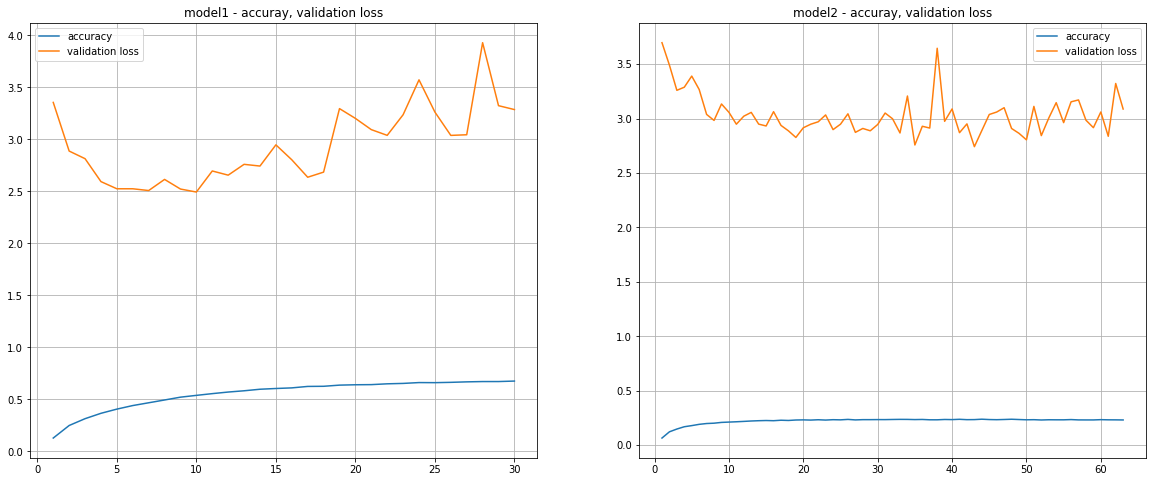

In [21]:
y_acc2 = hist2.history["accuracy"]
y_vloss2 = hist2.history["val_loss"]
xs2 = np.arange(1, len(y_acc2) + 1)
y_acc1 = hist.history["accuracy"]
y_vloss1 = hist.history["val_loss"]
xs1 = np.arange(1, len(y_acc1) + 1)

plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
plt.title("model1 - accuray, validation loss")
plt.plot(xs1, y_acc1, label = "accuracy")
plt.plot(xs1, y_vloss1, label = "validation loss")
plt.grid(), plt.legend()
# plt.show()

plt.subplot(1, 2, 2)
plt.title("model2 - accuray, validation loss")
plt.plot(xs2, y_acc2, label = "accuracy")
plt.plot(xs2, y_vloss2, label = "validation loss")
plt.grid(), plt.legend()
plt.show()

In [25]:
print(f"model1 : {best_model.evaluate(X_test, y_test)}")
print(f"model2 : {best_model2.evaluate(X_test, y_test)}")

313/313 [==============================] - 2s 5ms/step - loss: 2.4580 - accuracy: 0.4115
model1 : [2.457970142364502, 0.4115000069141388]
313/313 [==============================] - 1s 4ms/step - loss: 2.7278 - accuracy: 0.3173
model2 : [2.7277770042419434, 0.3172999918460846]
